In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 6, 4

In [2]:
df = pd.read_csv('AirPassengers.csv')


In [3]:
df['Time'] = pd.to_datetime(df['Month'].astype(str)+"-01")
df.set_index('Time', inplace=True)
df

,Month,Passengers
Time,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121
...,...,...
1960-08-01,1960-08,606
1960-09-01,1960-09,508
1960-10-01,1960-10,461


Here, as we can see, there is data of every month from 1940 to 1960.

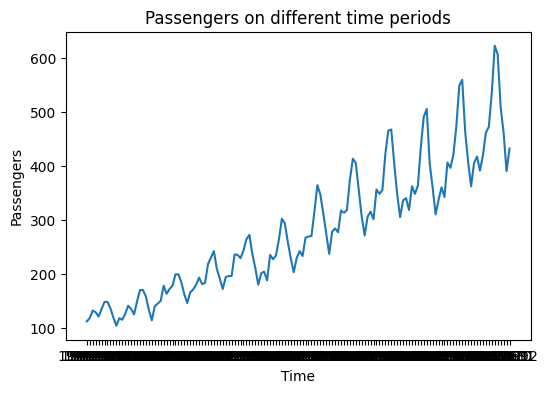

In [4]:
plt.plot(df['Month'], df['Passengers'])
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.title("Passengers on different time periods")

plt.show()

<Axes: xlabel='Month', ylabel='Passengers'>

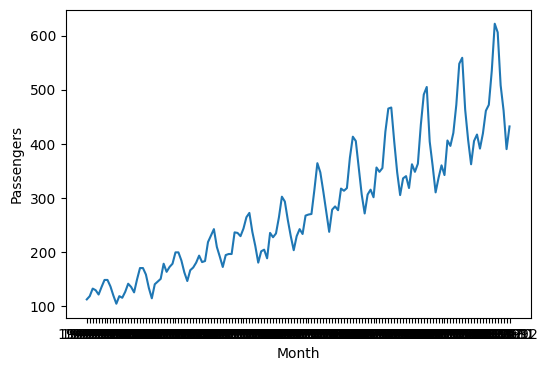

In [5]:
sns.lineplot(data=df, x=df.Month, y= df.Passengers)

### Stationarity
Stationary Mean and Stationary Variance through Rolling Method

In [6]:
df['rollMean'] = df.Passengers.rolling(window=12).mean() #window value in months
df['rollStd'] = df.Passengers.rolling(window=12).std()

<Axes: xlabel='Month', ylabel='Passengers'>

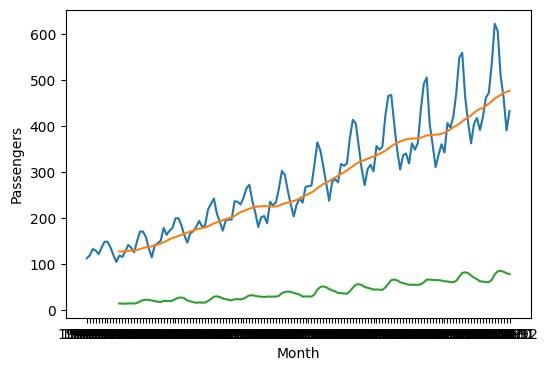

In [7]:
sns.lineplot(data=df, x=df.Month, y=df.Passengers)
sns.lineplot(data=df, x=df.Month, y=df.rollMean)
sns.lineplot(data=df, x=df.Month, y=df.rollStd)


This shows that the data is not stationary, as the mean is not stationary. 

### ADF Test
Now, performing Augmented Dickey Fuller Test

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
adfTest = adfuller(df['Passengers'], autolag='AIC')
adfTest

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
stats = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', '#logs used', 'number of observations used'])
stats

Test Statistics                  0.815369
p-value                          0.991880
#logs used                      13.000000
number of observations used    130.000000
dtype: float64

In [11]:
for key, values in adfTest[4].items():
    print(f'Criticality {key} : {values}')

Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


To be stationary, the test statistics < critical values
<br>
This shows that the data is non-stationary

In [12]:
def test_stationarity(df, var):
    df['rollMean'] = df[var].rolling(window=12).mean()
    df['rollStd'] = df[var].rolling(window=12).std()  


    adfTest = adfuller(df[var], autolag='AIC')
    stats = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', '#lags used', 'number of observations used'])
    print(stats)
    for key, values in adfTest[4].items():
        print(f'Criticality {key} : {values}')

    sns.lineplot(data=df, x=df.index, y=var)
    sns.lineplot(data=df, x=df.index, y=df.rollMean)
    sns.lineplot(data=df, x=df.index, y=df.rollStd)

# test_stationarity(df, 'Passengers')


### Making data stationary
Three ways: 
<li> Time Shift
<li> Log
<li> Square root, Cube

In [13]:
airdf = df[['Month', 'Passengers']]
airdf.set_index('Month', inplace=True)
airdf

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [14]:
def time_shift(df):
    #finding shift and then difference
    df['shift'] = df.Passengers.shift()
    df['shiftDiff'] = df['Passengers'] - df['shift'] 
    return df
time_shift(airdf)

/tmp/ipykernel_392938/3566616752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shift'] = df.Passengers.shift()
/tmp/ipykernel_392938/3566616752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shiftDiff'] = df['Passengers'] - df['shift']


,Passengers,shift,shiftDiff
Month,,,
1949-01,112,NaN,NaN
1949-02,118,112.0,6.0
1949-03,132,118.0,14.0
1949-04,129,132.0,-3.0
1949-05,121,129.0,-8.0
...,...,...,...
1960-08,606,622.0,-16.0
1960-09,508,606.0,-98.0
1960-10,461,508.0,-47.0


/tmp/ipykernel_392938/2410046258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean()
/tmp/ipykernel_392938/2410046258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window=12).std()


Test Statistics                 -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


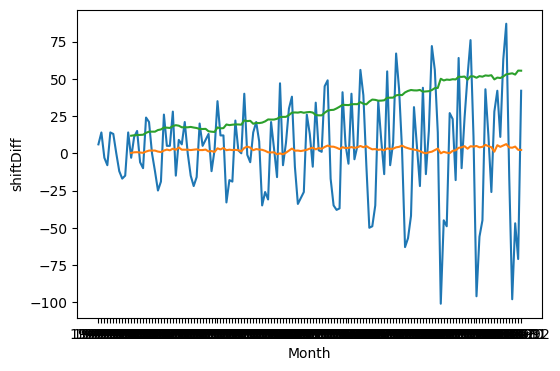

In [15]:
test_stationarity(airdf.dropna(), 'shiftDiff')

In [16]:
log_df = df[['Passengers']]
log_df['log'] = np.log(df['Passengers'])
log_df.head()

/tmp/ipykernel_392938/1143277303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(df['Passengers'])


,Passengers,log
Time,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


Test Statistics                 -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


/tmp/ipykernel_392938/2410046258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean()


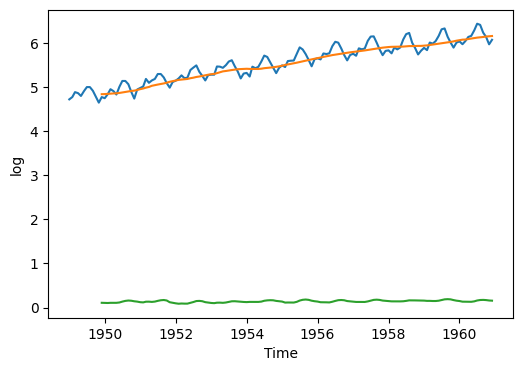

In [17]:
test_stationarity(log_df, 'log')

In [18]:
sqrt_df = df[['Passengers']]
sqrt_df['sqrt'] = np.sqrt(df['Passengers'])
sqrt_df.head()

/tmp/ipykernel_392938/3954940805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(df['Passengers'])


,Passengers,sqrt
Time,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


/tmp/ipykernel_392938/2410046258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean()


Test Statistics                 -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


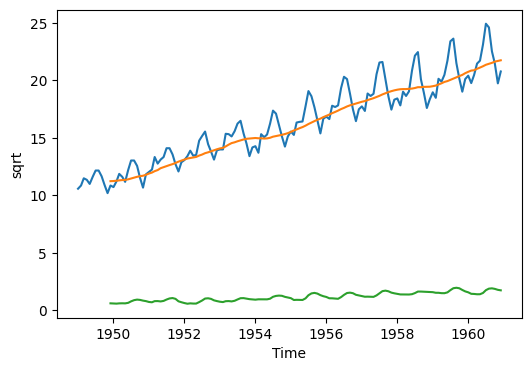

In [19]:
test_stationarity(sqrt_df, 'sqrt')

In [20]:
cbrt_df = df[['Passengers']]
cbrt_df['cbrt'] = np.cbrt(df['Passengers'])
cbrt_df.head()

/tmp/ipykernel_392938/823361376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(df['Passengers'])


,Passengers,cbrt
Time,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


/tmp/ipykernel_392938/2410046258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean()


Test Statistics                 -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


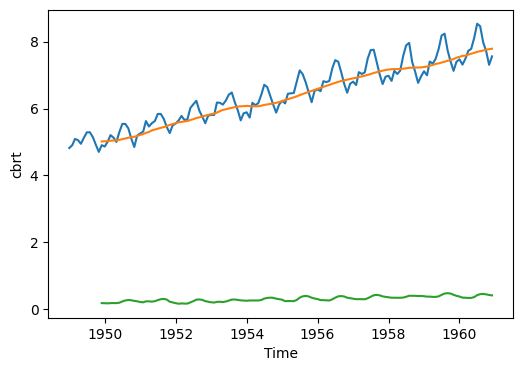

In [21]:
test_stationarity(cbrt_df, 'cbrt')

log and sqrt combined

In [22]:
log_df2 = log_df[['Passengers', 'log']]
log_df2['logsqrt'] = np.sqrt(log_df2['log'])
log_df2

/tmp/ipykernel_392938/1371631663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['logsqrt'] = np.sqrt(log_df2['log'])


,Passengers,log,logsqrt
Time,,,
1949-01-01,112,4.718499,2.172211
1949-02-01,118,4.770685,2.184190
1949-03-01,132,4.882802,2.209706
1949-04-01,129,4.859812,2.204498
1949-05-01,121,4.795791,2.189929
...,...,...,...
1960-08-01,606,6.406880,2.531182
1960-09-01,508,6.230481,2.496093
1960-10-01,461,6.133398,2.476570


Test Statistics                 -1.942528
p-value                          0.312326
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


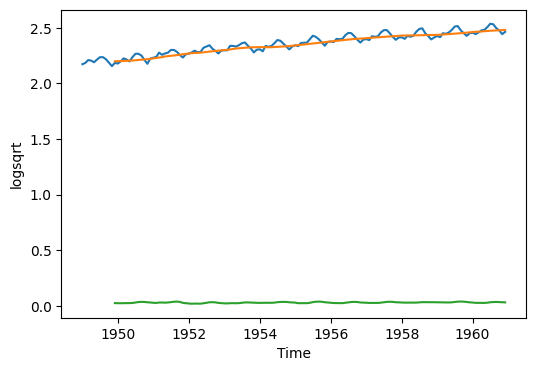

In [23]:
test_stationarity(log_df2, 'logsqrt')

log, sqrt and shift combined

In [24]:
log_df2['logsqrtShift'] = log_df2['logsqrt'] - log_df2['logsqrt'].shift()
log_df2

,Passengers,log,logsqrt,rollMean,rollStd,logsqrtShift
Time,,,,,,
1949-01-01,112,4.718499,2.172211,NaN,NaN,NaN
1949-02-01,118,4.770685,2.184190,NaN,NaN,0.011979
1949-03-01,132,4.882802,2.209706,NaN,NaN,0.025517
1949-04-01,129,4.859812,2.204498,NaN,NaN,-0.005208
1949-05-01,121,4.795791,2.189929,NaN,NaN,-0.014569
...,...,...,...,...,...,...
1960-08-01,606,6.406880,2.531182,2.474556,0.034496,-0.005143
1960-09-01,508,6.230481,2.496093,2.476110,0.035054,-0.035088
1960-10-01,461,6.133398,2.476570,2.478217,0.034175,-0.019523


Test Statistics                 -3.079116
p-value                          0.028138
#lags used                      13.000000
number of observations used    119.000000
dtype: float64
Criticality 1% : -3.4865346059036564
Criticality 5% : -2.8861509858476264
Criticality 10% : -2.579896092790057


/tmp/ipykernel_392938/2410046258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean()
/tmp/ipykernel_392938/2410046258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window=12).std()


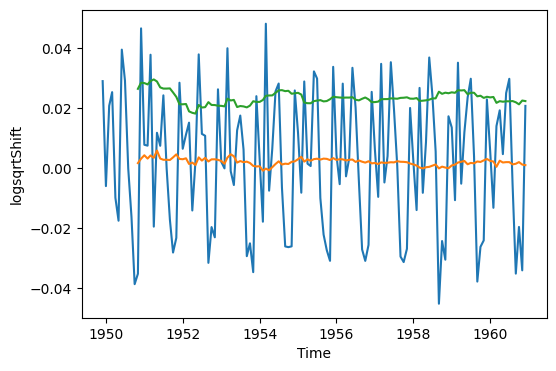

In [25]:
test_stationarity(log_df2.dropna(), 'logsqrtShift')

### ARIMA Model


In [41]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [27]:
airdata = df[['Passengers']].copy(deep=True)
airdata['Diff1'] = airdata['Passengers'].diff() #diff in 1 month
airdata['Diff12'] = airdata['Passengers'].diff(12) #difff in 12 months interval for seeing the trend

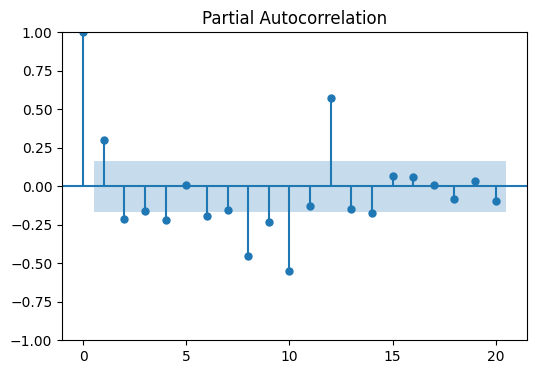

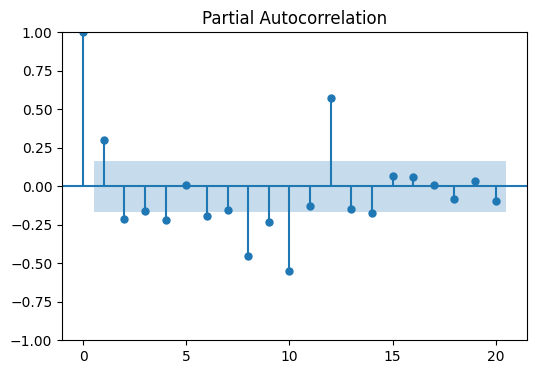

In [28]:
plot_pacf(airdata['Diff1'].dropna(), lags=20)

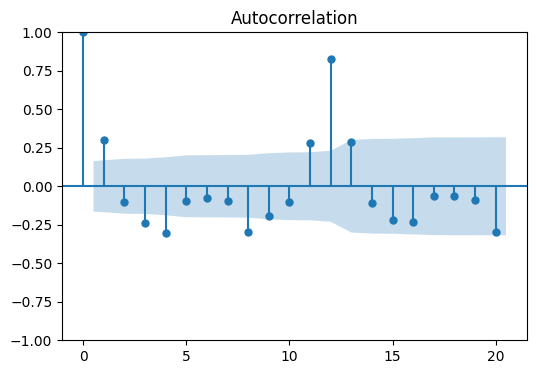

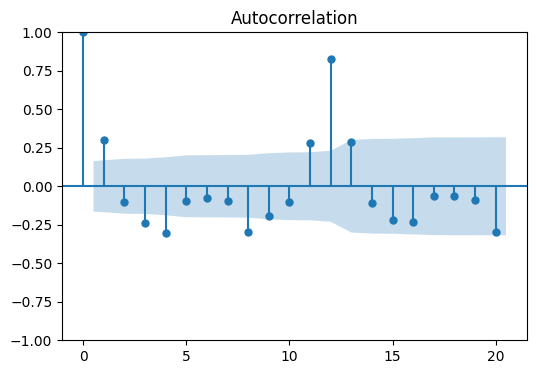

In [29]:
plot_acf(airdata['Diff1'].dropna(), lags = 20)

To determine p, q look PACF & ACF plot where the significant spikes drop off within the confidence interval.
significant spikes are the ones that are outside the blue shaded confidence interval.
Here, p = 1, q = 1 or select 3, and d = 1

Now, splitting into train and test data

In [30]:
train = airdata[:round(len(airdata)*70/100)]
test = airdata[round(len(airdata)*70/100):]
test.head()

,Passengers,Diff1,Diff12
Time,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [31]:
train['Passengers'] = pd.to_numeric(train['Passengers'], errors='coerce')
train['Passengers'].dropna(inplace=True)

/tmp/ipykernel_392938/4052659469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Passengers'] = pd.to_numeric(train['Passengers'], errors='coerce')
/tmp/ipykernel_392938/4052659469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Passengers'].dropna(inplace=True)


In [47]:
amodel = ARIMA(train['Passengers'], order = (1,1,3))
# model = SARIMAX(train['Passengers'], order = (1, 1, 3))
modelfit = amodel.fit()
# model_fit = model.fit()
prediction = modelfit.predict(start=test.index[0], end=test.index[-1])

/home/ayusao/virtual/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ayusao/virtual/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ayusao/virtual/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [58]:
airdata['arimaPred'] = prediction
airdata.tail()

,Passengers,Diff1,Diff12,arimaPred
Time,,,,
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333
1960-10-01,461,-47.0,54.0,341.111333
1960-11-01,390,-71.0,28.0,341.111333
1960-12-01,432,42.0,27.0,341.111333


<Axes: xlabel='Time', ylabel='Passengers'>

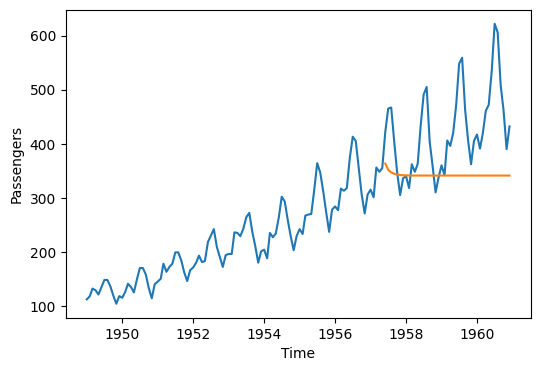

In [61]:
airdata.dropna()
sns.lineplot(data=airdata, x=airdata.index, y='Passengers')
sns.lineplot(data=airdata, x=airdata.index, y = 'arimaPred')

In [62]:
from sklearn.metrics import mean_squared_error

In [64]:
np.sqrt(mean_squared_error(test['Passengers'], prediction))

111.1101033142743

## SARIMAX Model


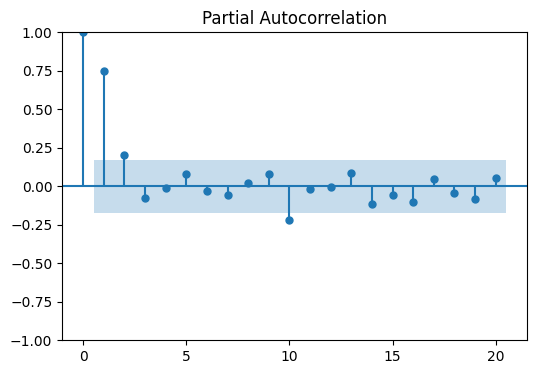

In [72]:
plot_pacf(airdata['Diff12'].dropna(), lags = 20);

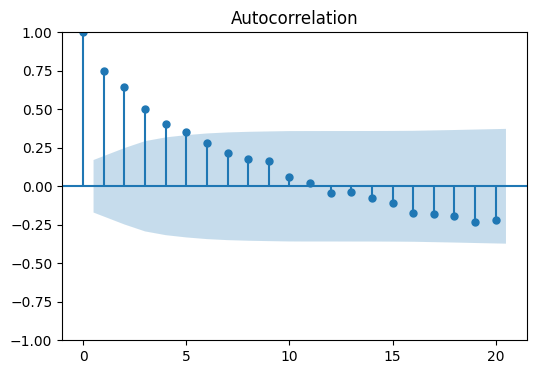

In [73]:
plot_acf(airdata['Diff12'].dropna(), lags = 20);

In [77]:
sarmodel = SARIMAX(train['Passengers'], order=(2,1,4), seasonal_order=(1,1,3,12))
sarmodel_fit = sarmodel.fit()
prediction = sarmodel_fit.predict(start= test.index[0], end= test.index[-1])
airdata['sarimaPred'] = prediction

/home/ayusao/virtual/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ayusao/virtual/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ayusao/virtual/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18276D+00    |proj g|=  1.49476D-01

At iterate    5    f=  3.15697D+00    |proj g|=  1.18401D-02

At iterate   10    f=  3.14195D+00    |proj g|=  3.07593D-02

At iterate   15    f=  3.13471D+00    |proj g|=  2.55755D-02

At iterate   20    f=  3.12879D+00    |proj g|=  2.73353D-03

At iterate   25    f=  3.12819D+00    |proj g|=  8.25680D-03

At iterate   30    f=  3.12576D+00    |proj g|=  1.85894D-02

At iterate   35    f=  3.12453D+00    |proj g|=  4.05588D-03

At iterate   40    f=  3.12297D+00    |proj g|=  1.37635D-02

At iterate   45    f=  3.12265D+00    |proj g|=  1.37702D-03

At iterate   50    f=  3.12261D+00    |proj g|=  9.82951D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/ayusao/virtual/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Time', ylabel='Passengers'>

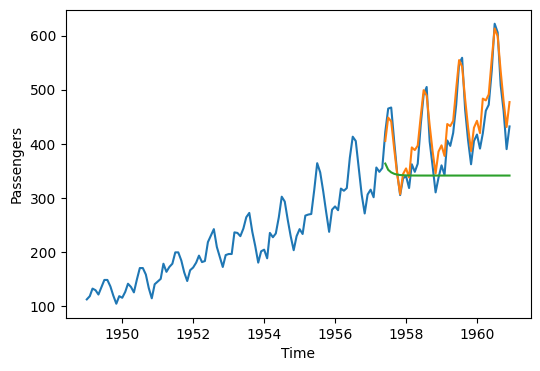

In [79]:
airdata.dropna()
sns.lineplot(data=airdata, x=airdata.index, y='Passengers')
sns.lineplot(data=airdata, x=airdata.index, y = 'sarimaPred')
sns.lineplot(data=airdata, x=airdata.index, y = 'arimaPred')

In [76]:
np.sqrt(mean_squared_error(test['Passengers'], prediction))

27.68257761132224

#### Let's do it for the future data

In [94]:
futureData = pd.DataFrame(pd.date_range(start='1961-01-01', end='1965-12-01', freq='MS'), columns=['Dates'])
futureData.set_index('Dates', inplace=True)
futureData.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


<Axes: >

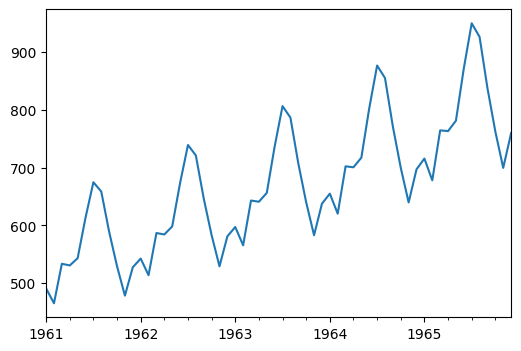

In [95]:
sarmodel_fit.predict(start=futureData.index[0], end=futureData.index[-1]).plot()

Plotting along with the other data

<Axes: xlabel='Time', ylabel='Passengers'>

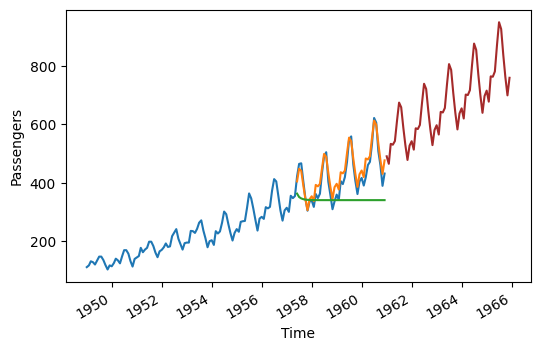

In [96]:
airdata.dropna()
sns.lineplot(data=airdata, x=airdata.index, y='Passengers')
sns.lineplot(data=airdata, x=airdata.index, y = 'sarimaPred')
sns.lineplot(data=airdata, x=airdata.index, y = 'arimaPred')
sarmodel_fit.predict(start=futureData.index[0], end=futureData.index[-1]).plot(color='brown')

Thus, the model captures the overall trend and some seasonality but does not perfectly align with the actual data during the fitting phase. The future predictions (shown by the brown line) generally follow the increasing trend of the data but might be too smooth, missing some of the finer seasonal variations.